In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
dir = Path().resolve()
csv_path = dir.parent / 'Supplement Sales Data' / 'DATA' / 'Supplement_Sales_Weekly_Expanded.csv'


df = pd.read_csv(csv_path)

In [3]:
df.head()

Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89   
2  2020-01-06      Fish Oil        Omega         161  12.91  2078.51   
3  2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80   
4  2020-01-06   Pre-Workout  Performance         157  35.47  5568.79   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0.25               0   Canada   Amazon  
3      0.08               0   Canada  Walmart  
4      0.25               3   Canada    iHerb

In [4]:
print(df.shape)

(4384, 10)


In [5]:
df.tail()

Date        Product Name    Category  Units Sold  Price  Revenue  \
4379  2025-03-31           Melatonin   Sleep Aid         160  47.79  7646.40   
4380  2025-03-31              Biotin     Vitamin         154  38.12  5870.48   
4381  2025-03-31   Green Tea Extract  Fat Burner         139  20.40  2835.60   
4382  2025-03-31     Iron Supplement     Mineral         154  18.31  2819.74   
4383  2025-03-31  Electrolyte Powder   Hydration         178  39.12  6963.36   

      Discount  Units Returned Location Platform  
4379      0.21               1      USA    iHerb  
4380      0.22               1       UK  Walmart  
4381      0.12               3      USA    iHerb  
4382      0.23               2   Canada   Amazon  
4383      0.23               0       UK    iHerb

In [6]:
df.columns

Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [8]:
df.describe()

Units Sold        Price       Revenue     Discount  Units Returned
count  4384.000000  4384.000000   4384.000000  4384.000000     4384.000000
mean    150.200274    34.781229   5226.569446     0.124398        1.531478
std      12.396099    14.198309   2192.491946     0.071792        1.258479
min     103.000000    10.000000   1284.000000     0.000000        0.000000
25%     142.000000    22.597500   3349.372500     0.060000        1.000000
50%     150.000000    34.720000   5173.140000     0.120000        1.000000
75%     158.000000    46.712500   7009.960000     0.190000        2.000000
max     194.000000    59.970000  10761.850000     0.250000        8.000000

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

In [10]:
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Units Sold'] < (Q1 - 1.5 * IQR)) | (df['Units Sold'] > (Q3 + 1.5 * IQR)))]

## Data Visualization



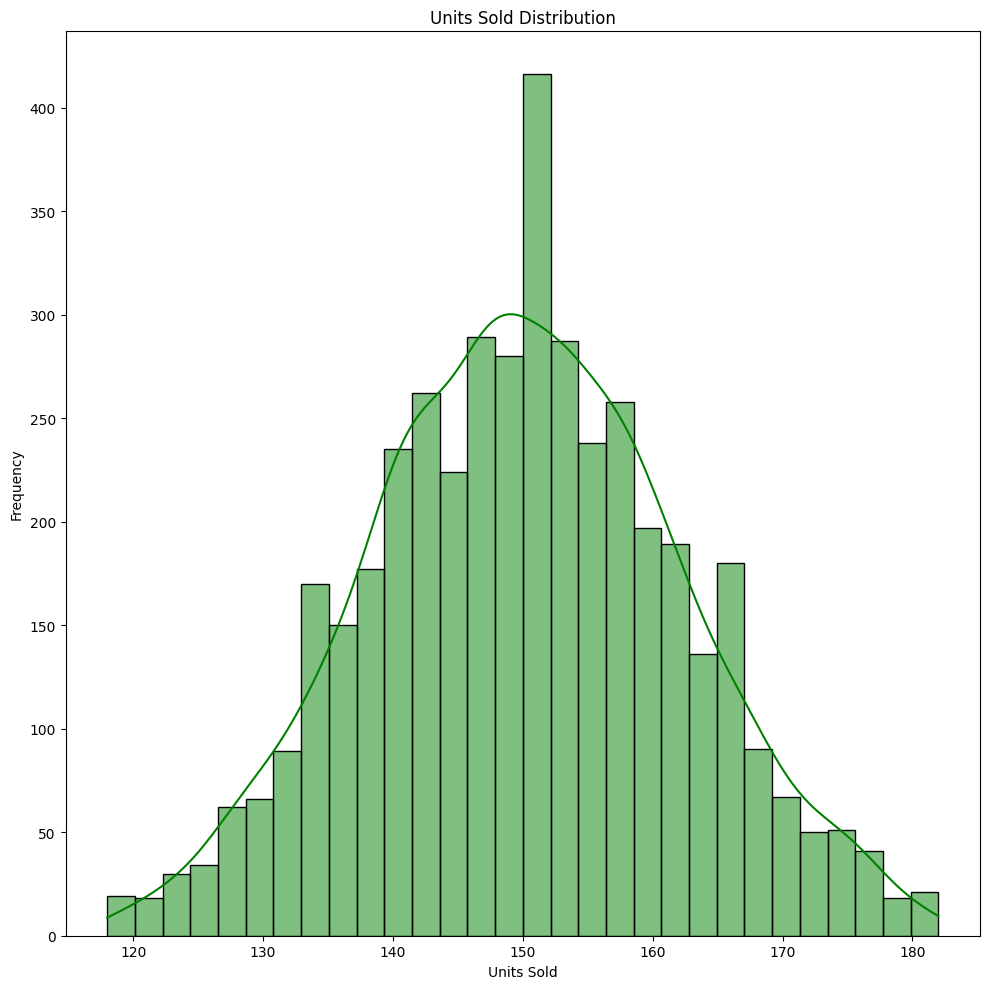

In [11]:
plt.figure(
    figsize=(10,10))
sns.histplot(
    df['Units Sold'], 
    bins=30, 
    kde=True,
    color='green',
    label='Units Sold'
)
plt.title(
    'Units Sold Distribution'
)
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

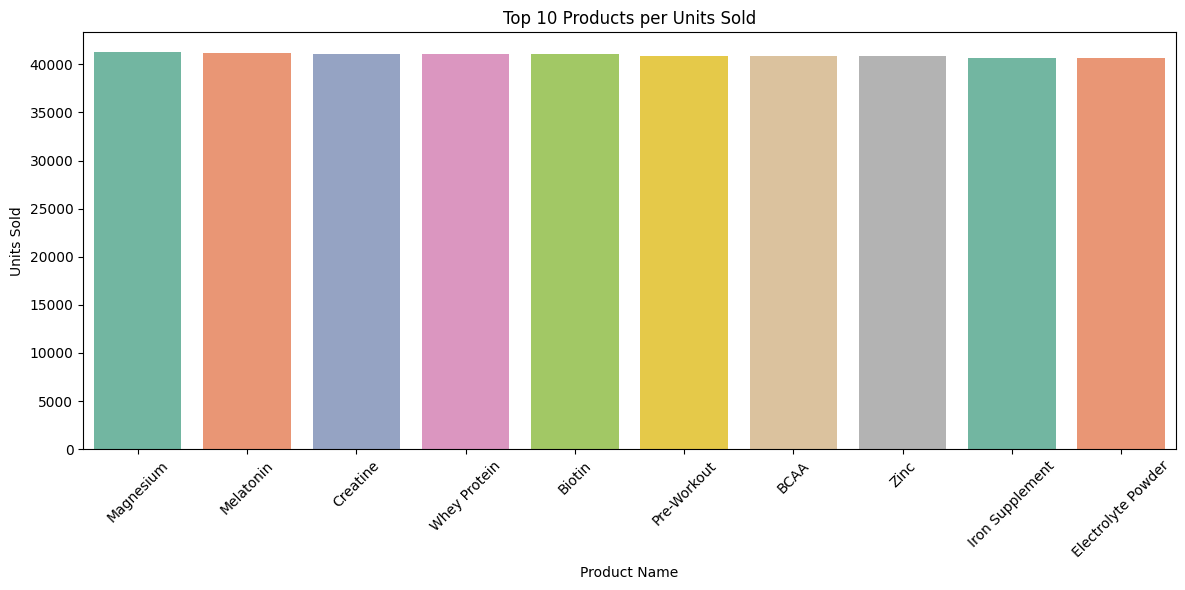

In [12]:
TP = df.groupby('Product Name')['Units Sold'].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(
    x=TP.index,
    y=TP.values,
    palette='Set2'
)
plt.title('Top 10 Products per Units Sold')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
print(f'Top 10 products per units sold: \n{TP}')

Top 10 products per units sold: 
Product Name
Magnesium             41270
Melatonin             41165
Creatine              41124
Whey Protein          41077
Biotin                41048
Pre-Workout           40876
BCAA                  40840
Zinc                  40832
Iron Supplement       40706
Electrolyte Powder    40690
Name: Units Sold, dtype: int64


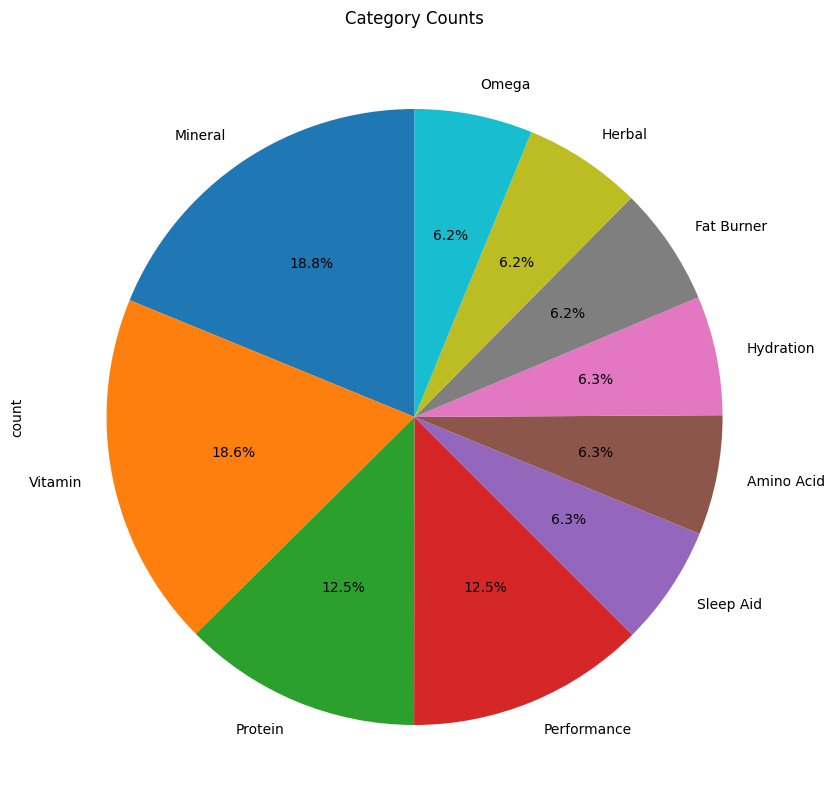

In [14]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10,10))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Category Counts')
plt.show()

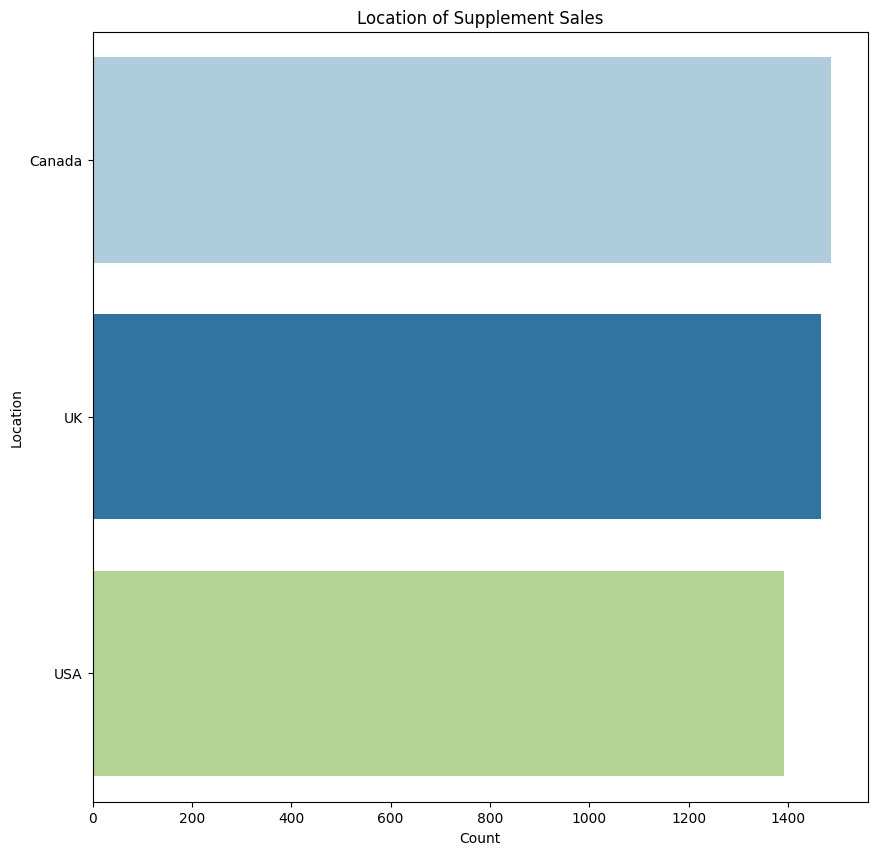

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, 
              y='Location', 
              palette='Paired')
plt.title('Location of Supplement Sales')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

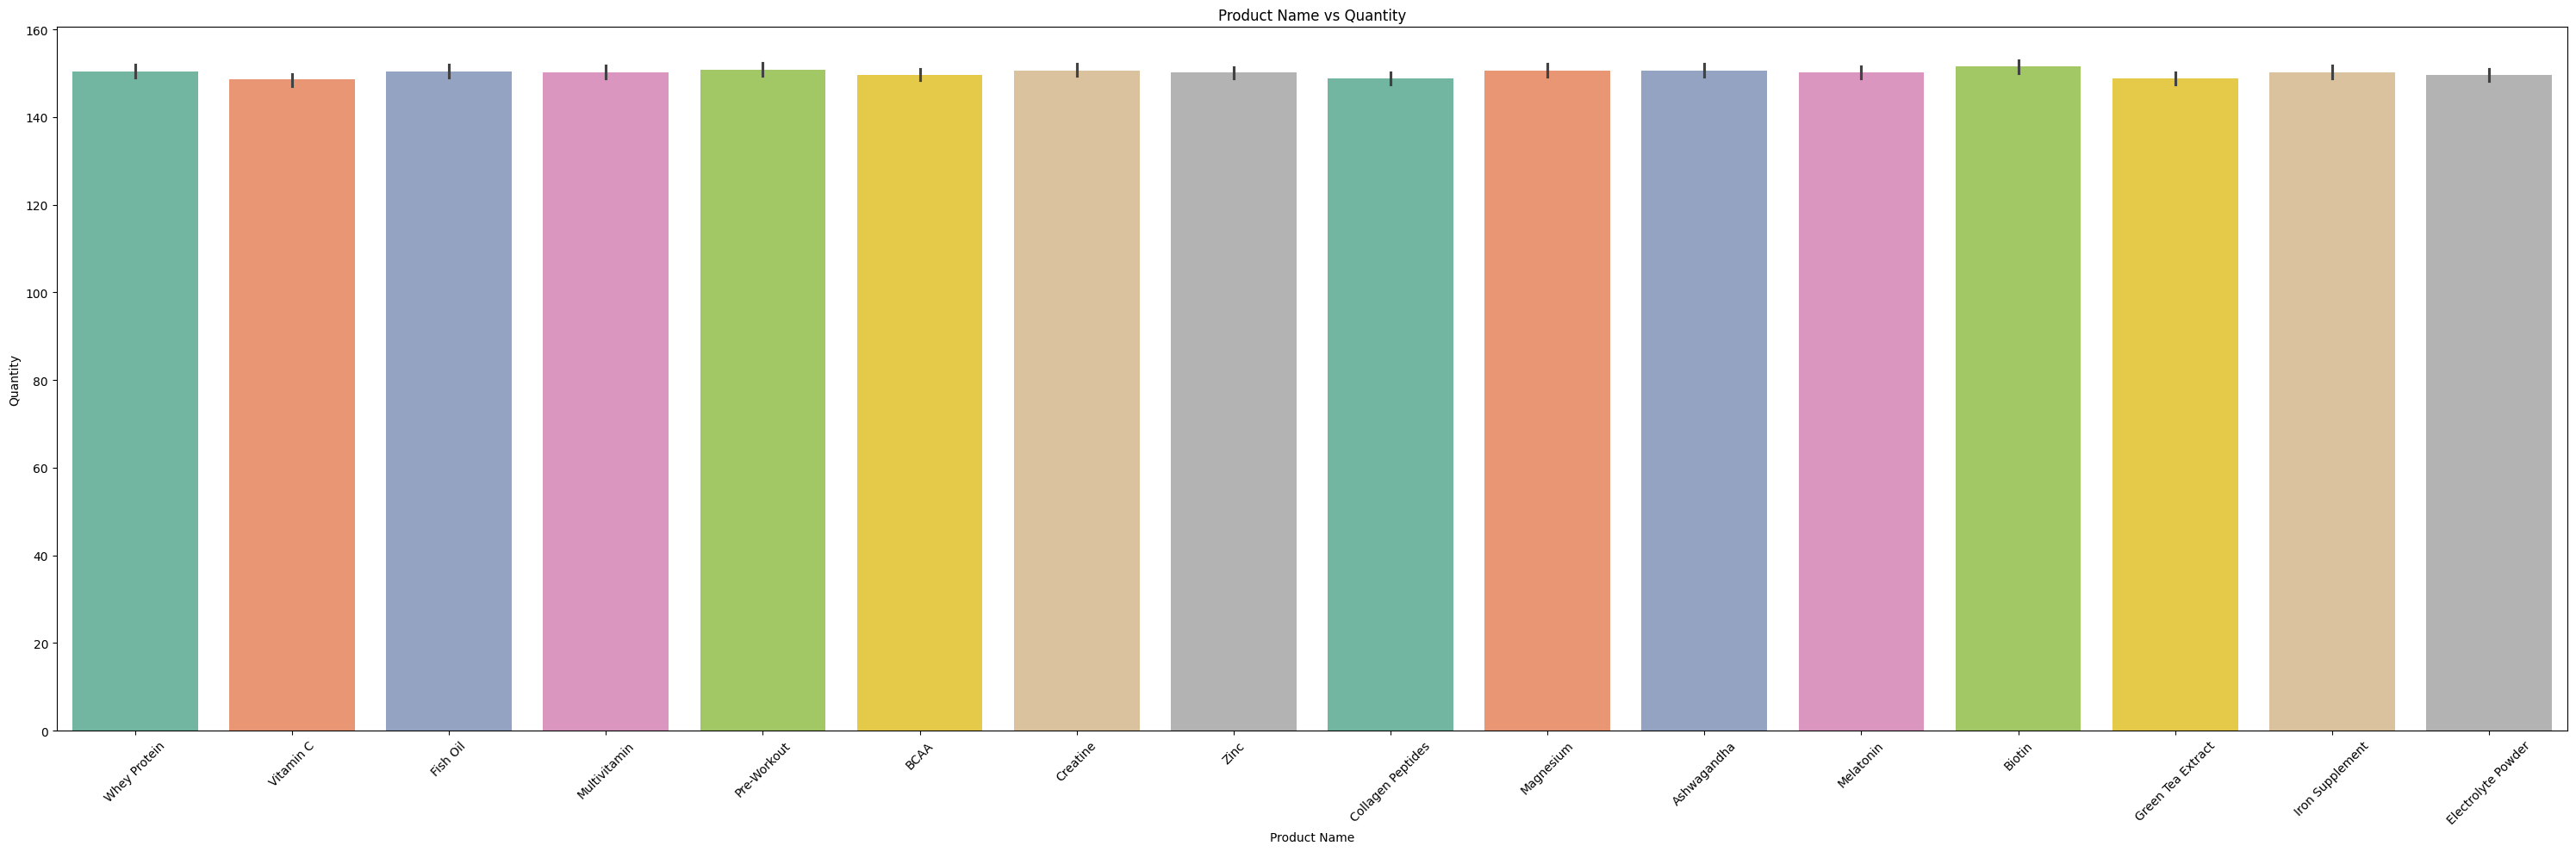

In [16]:
plt.figure(figsize=(30, 10))
sns.barplot(
    data=df,
    x='Product Name',
    y='Units Sold',
    palette='Set2'
)
plt.title('Product Name vs Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='Product Name', ylabel='Units Sold'>

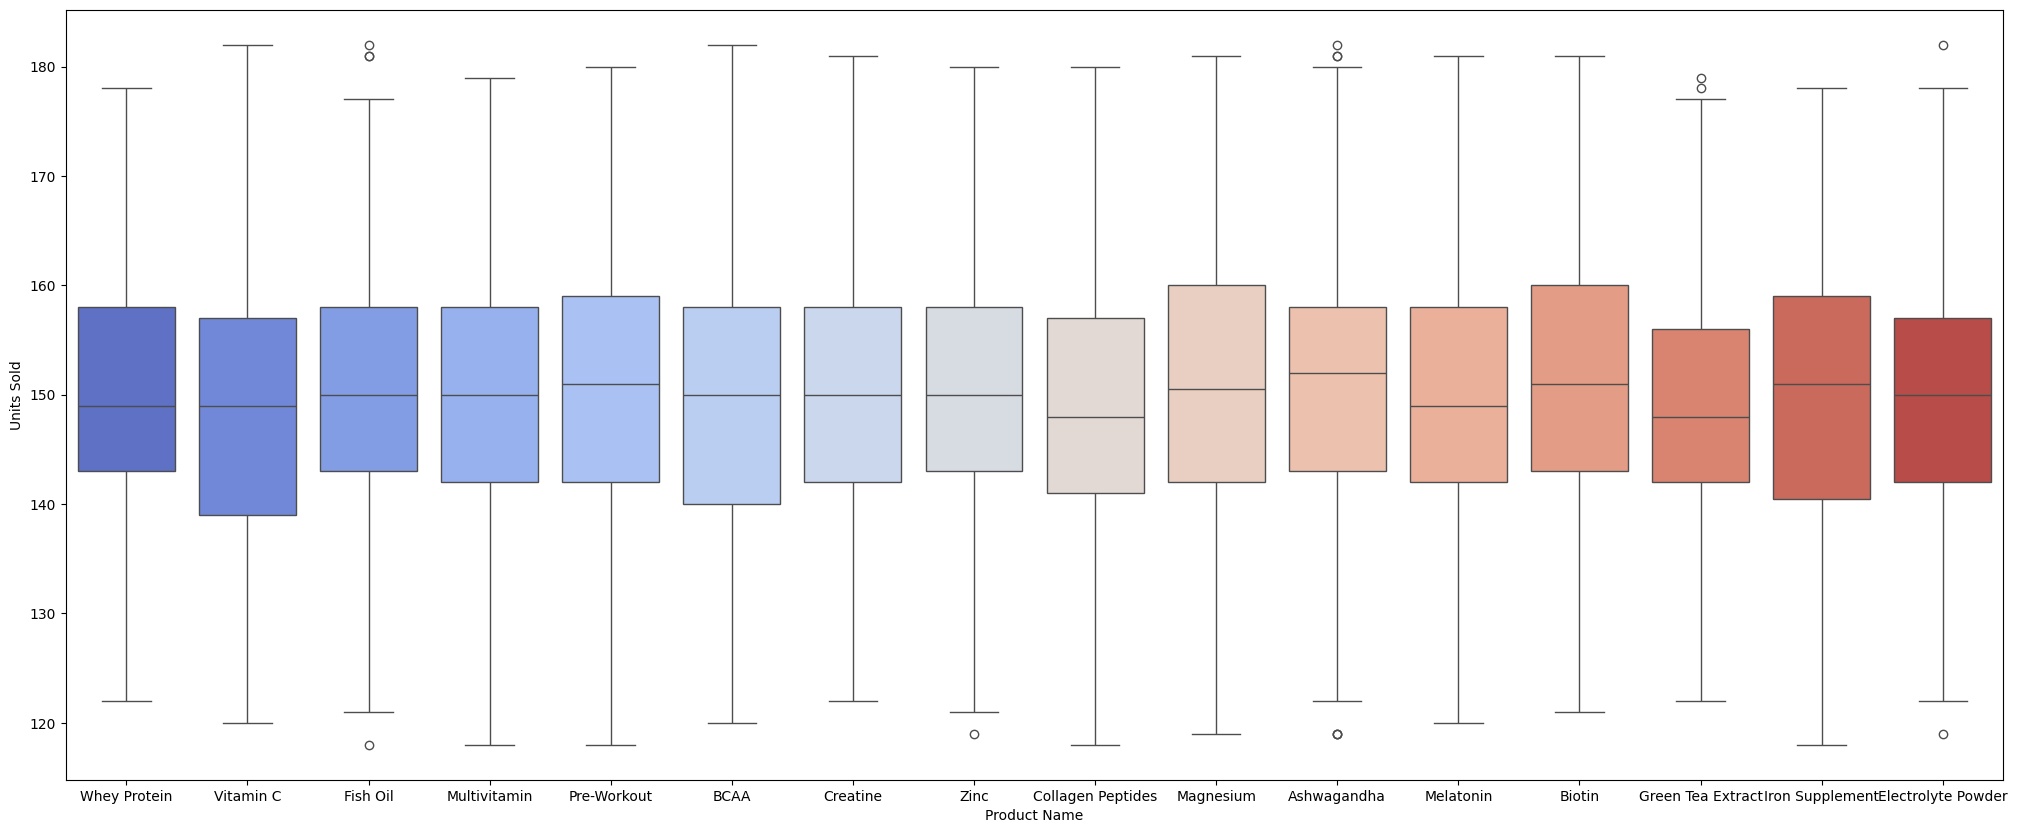

In [17]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Product Name',
            y='Units Sold',
            data=df,
            palette='coolwarm')

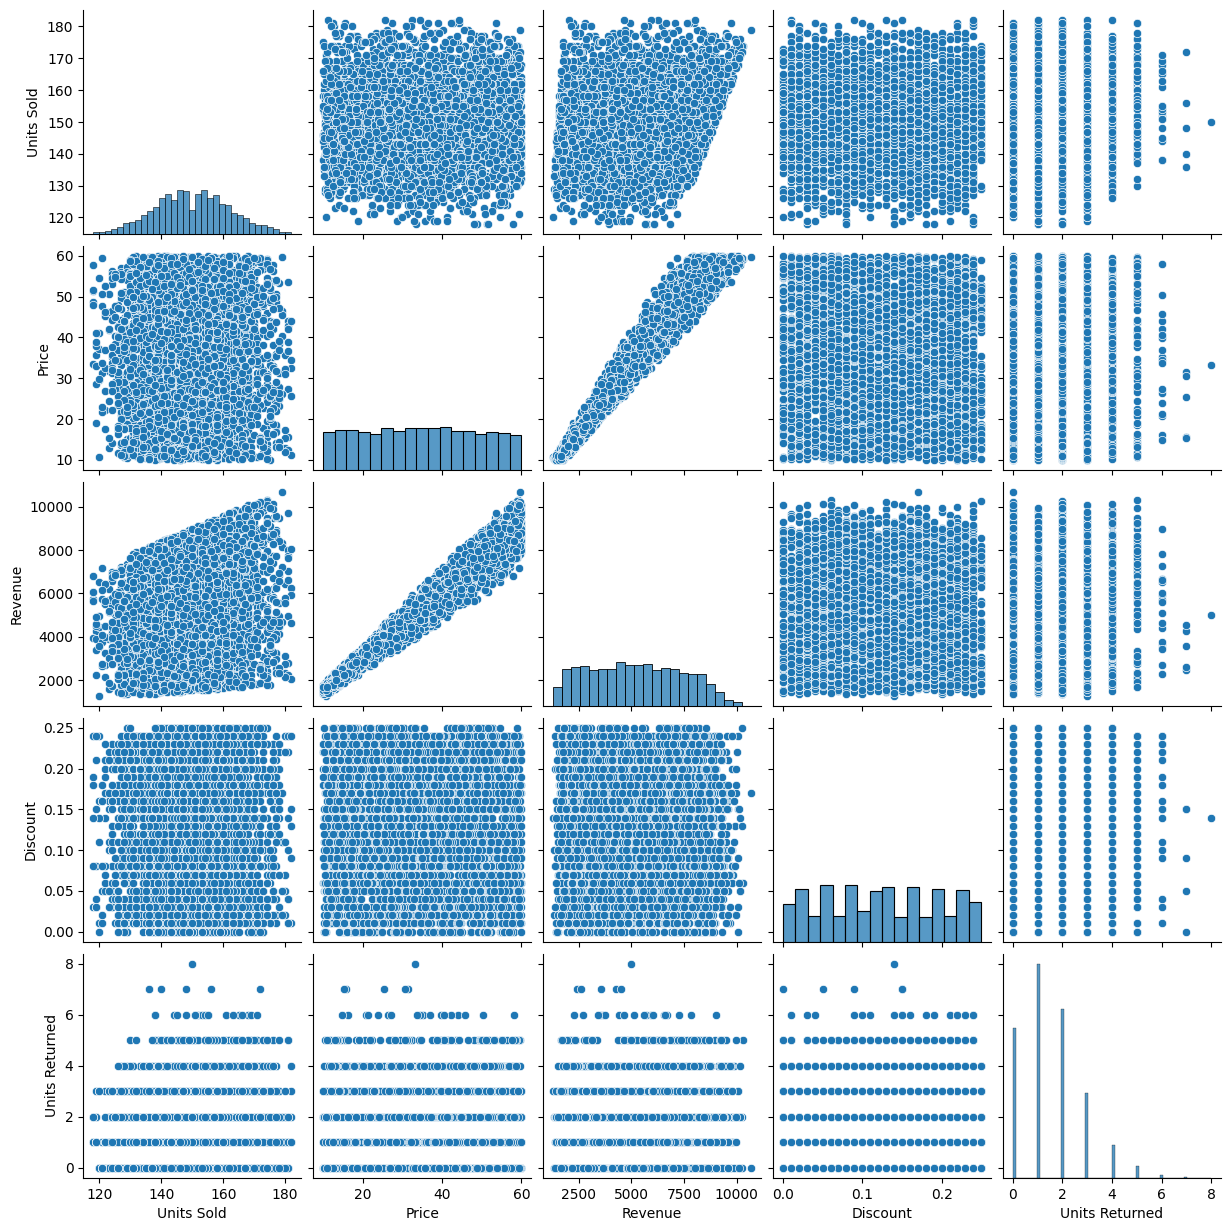

In [18]:
sns.pairplot(df[['Units Sold', 'Price', 'Revenue', 'Discount','Units Returned']],palette='Set2')

<Axes: xlabel='Units Sold', ylabel='Price'>

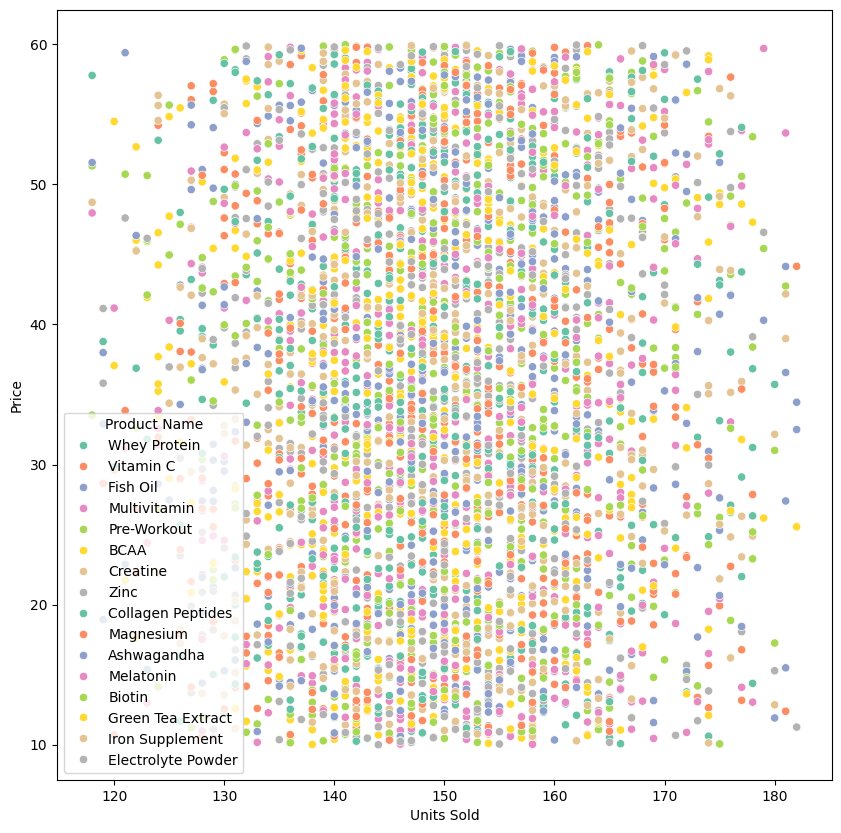

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Units Sold', y='Price', hue='Product Name', data=df, palette='Set2')

In [20]:
# Codificacion usando LabelEncoder
from sklearn.preprocessing import  LabelEncoder
label_encoder = LabelEncoder()

# Columnas a codificar
columns_to_encode = ['Product Name', 'Category', 'Location', 'Platform']



for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
df.head(10)

Date  Product Name  Category  Units Sold  Price  Revenue  Discount  \
0 2020-01-06            14         7         143  31.98  4573.14      0.03   
1 2020-01-06            13         9         139  42.51  5908.89      0.04   
2 2020-01-06             6         5         161  12.91  2078.51      0.25   
3 2020-01-06            11         9         140  16.07  2249.80      0.08   
4 2020-01-06            12         6         157  35.47  5568.79      0.25   
5 2020-01-06             1         0         154  41.19  6343.26      0.13   
6 2020-01-06             4         6         134  32.49  4353.66      0.05   
7 2020-01-06            15         4         147  46.68  6861.96      0.19   
8 2020-01-06             3         7         147  10.96  1611.12      0.06   
9 2020-01-06             9         4         134  20.76  2781.84      0.00   

   Units Returned  Location  Platform  Month  Weekday  
0               2         0         1      1        0  
1               0         1         0      1        0  
2               0         0         0      1        0  
3               0         0         1      1        0  
4               3         0         2      1        0  
5               1         1         1      1        0  
6               1         1         1      1        0  
7               0         0         0      1        0  
8               2         2         0      1        0  
9               0         0         0      1        0

In [21]:
df = df.drop(columns=['Date'], axis=1, inplace=False)

In [22]:
df.corr()

Product Name  Category  Units Sold     Price   Revenue  \
Product Name        1.000000  0.385732   -0.004679 -0.000173 -0.001597   
Category            0.385732  1.000000    0.011538 -0.005687 -0.002883   
Units Sold         -0.004679  0.011538    1.000000  0.010626  0.201965   
Price              -0.000173 -0.005687    0.010626  1.000000  0.978512   
Revenue            -0.001597 -0.002883    0.201965  0.978512  1.000000   
Discount            0.020360  0.001144   -0.008768 -0.009937 -0.013628   
Units Returned      0.003891  0.007088    0.113261 -0.009139  0.013069   
Location           -0.022222  0.003797    0.019530  0.003131  0.006573   
Platform            0.023964  0.010503    0.021431  0.005657  0.008846   
Month               0.000766 -0.001167   -0.008290  0.006550  0.005618   
Weekday                  NaN       NaN         NaN       NaN       NaN   

                Discount  Units Returned  Location  Platform     Month  \
Product Name    0.020360        0.003891 -0.022222  0.023964  0.000766   
Category        0.001144        0.007088  0.003797  0.010503 -0.001167   
Units Sold     -0.008768        0.113261  0.019530  0.021431 -0.008290   
Price          -0.009937       -0.009139  0.003131  0.005657  0.006550   
Revenue        -0.013628        0.013069  0.006573  0.008846  0.005618   
Discount        1.000000        0.003759  0.002162  0.007095  0.026590   
Units Returned  0.003759        1.000000  0.005343 -0.012180  0.023410   
Location        0.002162        0.005343  1.000000 -0.009071  0.000032   
Platform        0.007095       -0.012180 -0.009071  1.000000 -0.022728   
Month           0.026590        0.023410  0.000032 -0.022728  1.000000   
Weekday              NaN             NaN       NaN       NaN       NaN   

                Weekday  
Product Name        NaN  
Category            NaN  
Units Sold          NaN  
Price               NaN  
Revenue             NaN  
Discount            NaN  
Units Returned      NaN  
Location            NaN  
Platform            NaN  
Month               NaN  
Weekday             NaN

<Axes: >

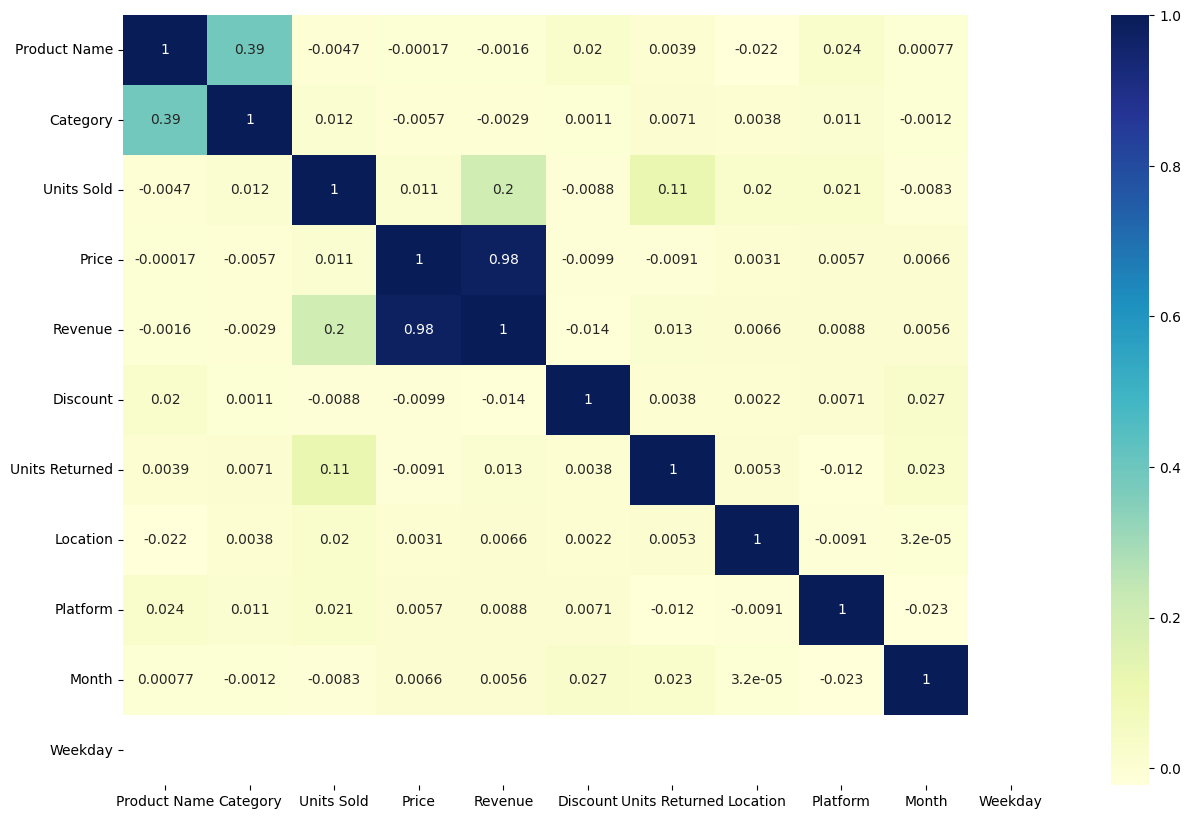

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

## Model 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [25]:
X = df.drop(columns='Category', axis=1, inplace=False)
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [26]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(max_depth=7,random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


 Logistic Regression accuracy: 26.81% 

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.20      0.30      0.24        46
           2       0.87      0.98      0.92        48
           3       0.14      0.44      0.21        54
           4       0.27      0.32      0.29       167
           5       0.28      0.33      0.31        51
           6       0.09      0.03      0.05       120
           7       0.23      0.04      0.07       115
           8       0.11      0.23      0.15        56
           9       0.18      0.09      0.12       163

    accuracy                           0.27       869
   macro avg       0.31      0.36      0.32       869
weighted avg       0.26      0.27      0.24       869

Confusion matrix for Logistic Regression:
[[42  0  7  0  0  0  0  0  0  0]
 [ 0 14  0  0  4  8  3  4  6  7]
 [ 1  0 47  0  0  0  0  0  0  0]
 [ 0  8  0 2

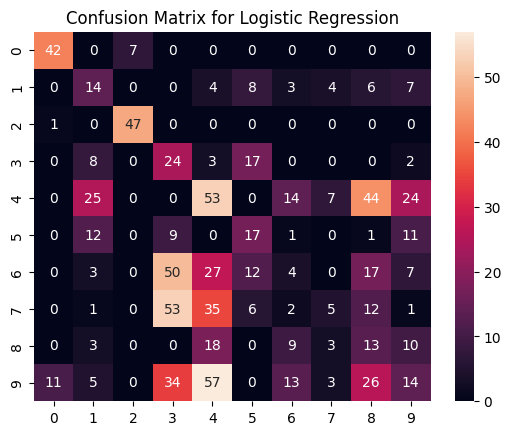


 Random Forest accuracy: 93.33% 

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        48
           3       0.95      1.00      0.97        54
           4       0.99      0.99      0.99       167
           5       1.00      1.00      1.00        51
           6       0.87      0.74      0.80       120
           7       0.95      0.90      0.92       115
           8       0.98      0.98      0.98        56
           9       0.82      0.92      0.87       163

    accuracy                           0.93       869
   macro avg       0.96      0.95      0.95       869
weighted avg       0.93      0.93      0.93       869

Confusion matrix for Random Forest:
[[ 49   0   0   0   0   0   0   0   0   0]
 [  0  46   0   0   0   0   0   0   0   0]
 [  0   0  48   0   0   0   0   0   0   0]


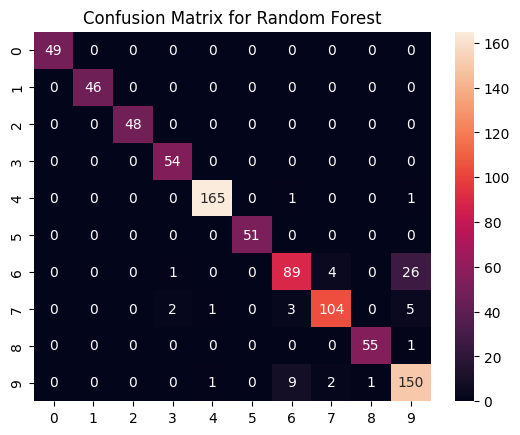


 Support Vector Machine accuracy: 11.05% 

Classification report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        48
           3       0.03      0.06      0.04        54
           4       0.20      0.20      0.20       167
           5       0.00      0.00      0.00        51
           6       0.15      0.34      0.21       120
           7       0.00      0.00      0.00       115
           8       0.06      0.32      0.10        56
           9       0.00      0.00      0.00       163

    accuracy                           0.11       869
   macro avg       0.04      0.09      0.06       869
weighted avg       0.07      0.11      0.08       869

Confusion matrix for Support Vector Machine:
[[ 0  0  0  5  8  0 12  0 24  0]
 [ 1  0  0  4 14  0 12  0 15  0]
 [ 1  0  0  4 12  0 11  0 20  0]
 [ 

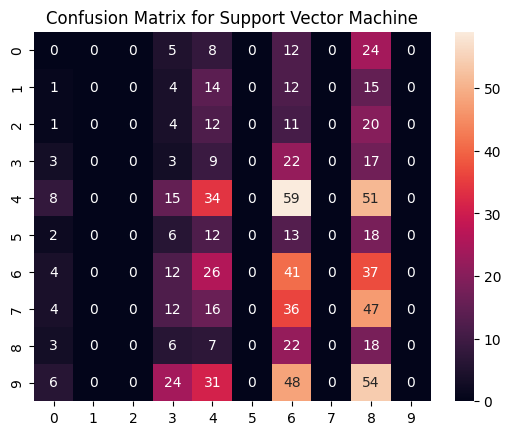


 Decision Tree accuracy: 94.82% 

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00       167
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00       120
           7       0.72      1.00      0.84       115
           8       1.00      1.00      1.00        56
           9       1.00      0.72      0.84       163

    accuracy                           0.95       869
   macro avg       0.97      0.97      0.97       869
weighted avg       0.96      0.95      0.95       869

Confusion matrix for Decision Tree:
[[ 49   0   0   0   0   0   0   0   0   0]
 [  0  46   0   0   0   0   0   0   0   0]
 [  0   0  48   0   0   0   0   0   0   0]


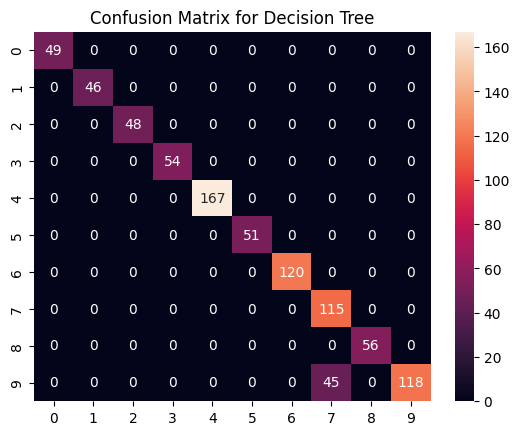


 K-Nearest Neighbors accuracy: 11.28% 

Classification report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.14      0.33      0.19        49
           1       0.09      0.26      0.14        46
           2       0.08      0.12      0.10        48
           3       0.07      0.13      0.09        54
           4       0.20      0.11      0.14       167
           5       0.08      0.14      0.10        51
           6       0.13      0.11      0.12       120
           7       0.11      0.06      0.08       115
           8       0.07      0.09      0.08        56
           9       0.17      0.04      0.07       163

    accuracy                           0.11       869
   macro avg       0.11      0.14      0.11       869
weighted avg       0.13      0.11      0.11       869

Confusion matrix for K-Nearest Neighbors:
[[16  6  7  7  4  0  4  2  1  2]
 [ 3 12  2  4  3  9  8  0  5  0]
 [18  6  6  7  2  3  2  2  2  0]
 [ 7  8  8  

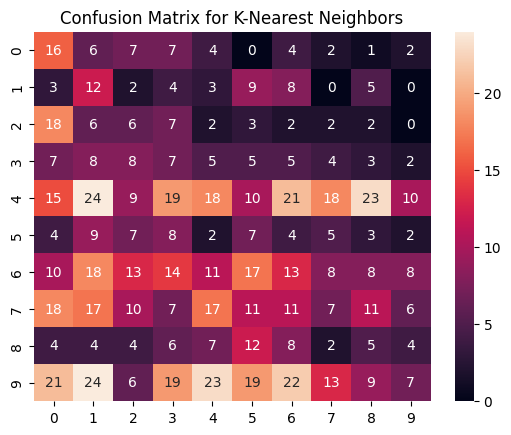

In [27]:
for name, clf in classifiers.items():
    model = clf
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} accuracy: {accuracy*100:.2f}% \n')
    report = classification_report(y_test, y_pred)
    print(f'Classification report for {name}:\n{report}')

    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {name}:\n{cm}')
    feature_names = X.columns.tolist()
    if name == 'Decision Tree':
        plt.figure(figsize=(150, 100))
        plot_tree(clf, feature_names=feature_names, class_names=[str(i) for i in clf.classes_], 
                  filled=True, rounded=True, fontsize=10)
        plt.title('Árbol de Decisión')
        plt.show()
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    